In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the bank.csv file into a pandas dataframe
df = pd.read_csv("../../dataset/bank+marketing/bank/bank.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [3]:
# Seperate the df into seperate columns using the ; as the delimeter and keep the column names as-is
df = df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""
4,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no"""


In [4]:
#Rename the columns in df
new_column_names = [
    "age", "job", "marital", "education", "default", "balance",
    "housing", "loan", "contact", "day", "month", "duration",
    "campaign", "pdays", "previous", "poutcome", "y"
]

df.columns = new_column_names
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""
4,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no"""


In [5]:
# Check for null values in df
null_values = df.isnull().sum()
print(null_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# Verify there are no duplicate rows in dataframe
duplicate_rows = df.duplicated().sum()

if duplicate_rows == 0:
    print("No duplicate rows found in the dataframe.")
else:
    print(f"{duplicate_rows} duplicate rows found in the dataframe.")

No duplicate rows found in the dataframe.


In [7]:
# Convert df[balance], df[day], and df[duration] to int
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)

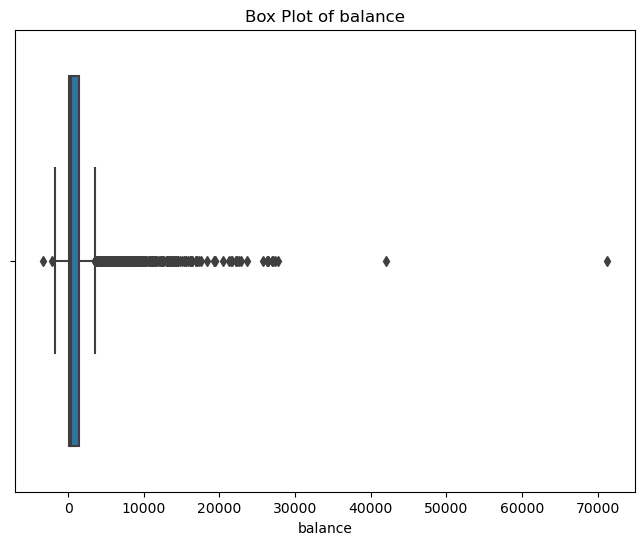

In [8]:
# Visualize outliers in df[balance]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])
plt.title("Box Plot of balance")
plt.xlabel("balance")
plt.show()


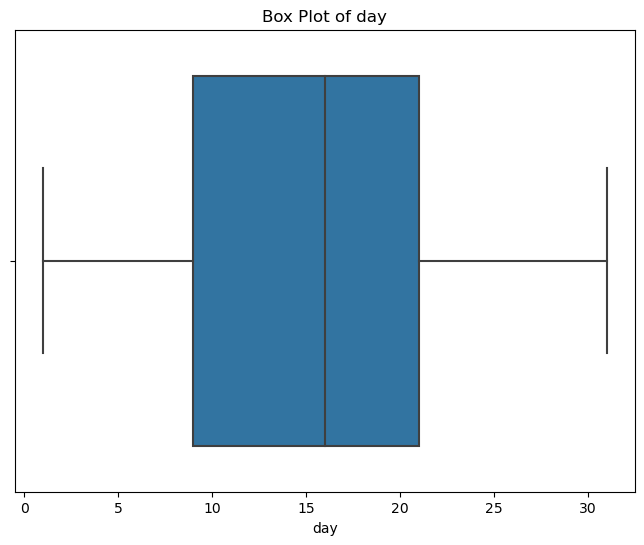

In [9]:
# Visualize outliers in df[balance]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['day'])
plt.title("Box Plot of day")
plt.xlabel("day")
plt.show()

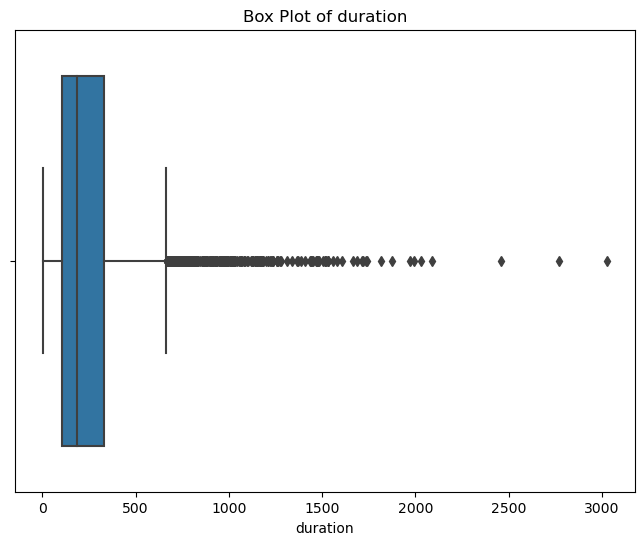

In [10]:
# Visualize outliers in df[balance]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration'])
plt.title("Box Plot of duration")
plt.xlabel("duration")
plt.show()

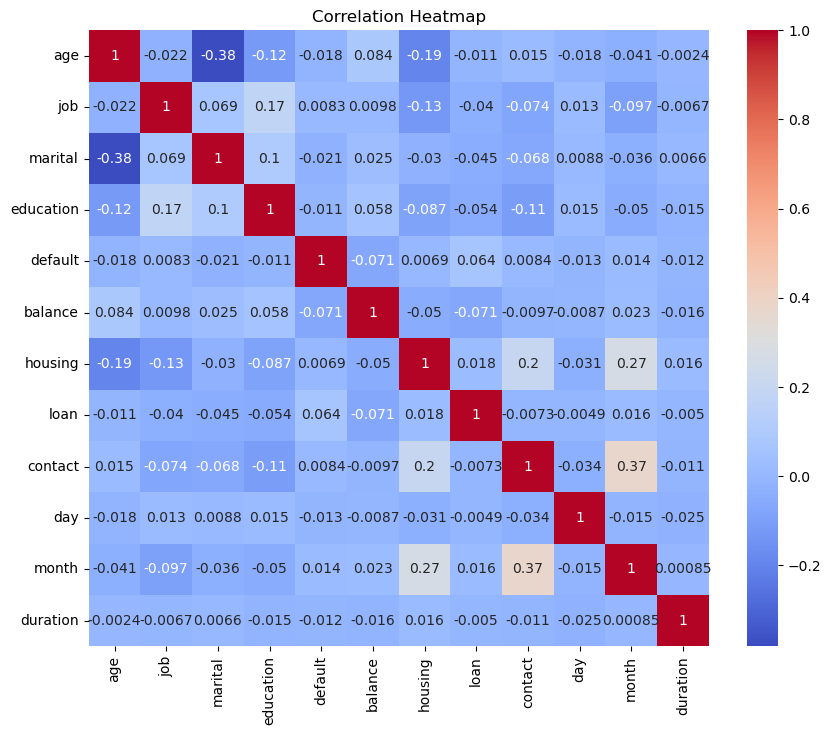

In [11]:
# Seaborn heatmap of dataframe  

# Define a function to encode non-numeric columns into numeric values
def encode_categorical(df):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    categorical_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
    
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    return df

# Encode categorical columns in df
df_encoded = encode_categorical(df.copy())

# Select only numeric columns from df
numeric_df = df_encoded.select_dtypes(include='number')

# Seaborn heatmap of numeric DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()